In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.tight_layout()
plt.style.use('seaborn-v0_8-darkgrid')

from datetime import datetime

from utils import *

<Figure size 640x480 with 0 Axes>

### Load the Dataset

In [3]:
df = dataset()

### Abstracts Word Cloud

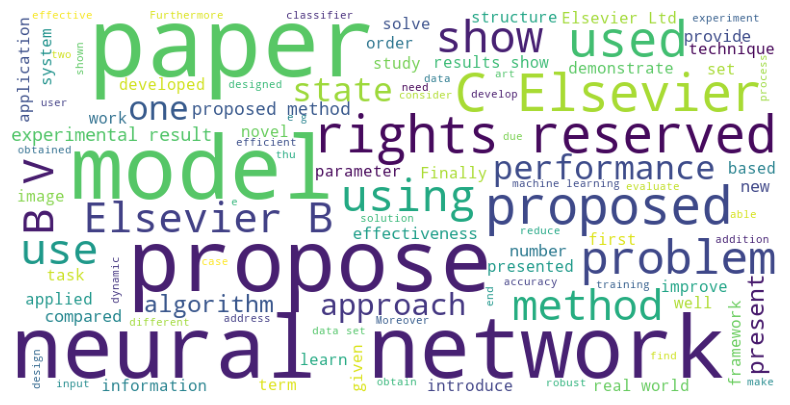

In [4]:
# Word Cloud of the abstracts
from wordcloud import WordCloud

abstracts = df['Abstract'].dropna().tolist()
abstracts_string = ' '.join(abstracts)

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, max_font_size=100, random_state=42).generate(abstracts_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Missing `Abstracts` Analysis

In [5]:
# Proportion of missing abstracts

df_missing_abstracts = pd.DataFrame(df['Abstract'].isnull().value_counts())
df_missing_abstracts.rename(columns={'Abstract':'Count'}, inplace=True)
df_missing_abstracts['Percentage'] = df_missing_abstracts['Count'].apply(lambda x: str(round(x/df_missing_abstracts['Count'].sum()*100, 3))+'%')
df_missing_abstracts.index = ['Abstract available', 'Abstract missing']
df_missing_abstracts

,Count,Percentage
Abstract available,164756,97.629%
Abstract missing,4001,2.371%


#### Time distribution of missing abstracts

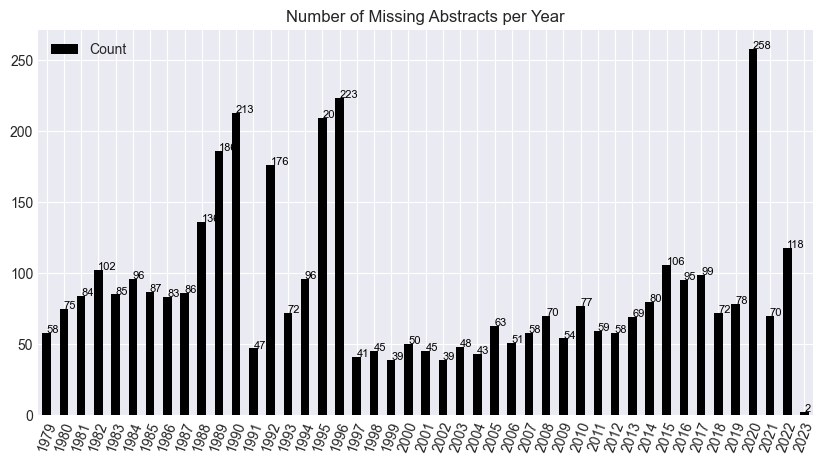

In [6]:
# Bar plot of the number of publications per year

df_pub_year = pd.DataFrame(df.iloc[np.where(df['Abstract'].isnull())]['Publication Year'].value_counts())
df_pub_year.rename(columns={'Publication Year':'Count'}, inplace=True)
df_pub_year.sort_index(inplace=True)
df_pub_year.plot(kind='bar', figsize=(10, 5), title='Number of Missing Abstracts per Year', color='black')

for i, v in enumerate(df_pub_year['Count']):
    plt.text(i-0.004, v+0.05, str(v)[:3], color='black', fontsize=8)

plt.xticks([i for i in range(0, len(df_pub_year.index), 1)], [int(i) for i in df_pub_year.index], rotation=70)
plt.show()

### Comentários sobre os Abstracts faltantes

1. Os Abstracts faltantes estão distribuídos de manera relativamente uniforme no dataset, com alguns anos de pico, por exeplo o ano de 2020. Apenas 2.371% dos registros estão sem Abstracts. Como a quantidade de registros é muito grande, a perda de informação é pequena;

2. Uma análise mais detalhada dos registros sem Abstracts não consegue explicar a razão pela qual eles estão faltando. É possível preencher boa parte dos valores faltantes por meio de um Scrapping do Google Scholar.

## `Article Title` Analysis

In [7]:
# Proportion of missing Article Title

df_missing_abstracts = pd.DataFrame(df['Article Title'].isnull().value_counts())
df_missing_abstracts.rename(columns={'Article Title':'Count'}, inplace=True)
df_missing_abstracts['Percentage'] = df_missing_abstracts['Count'].apply(lambda x: str(round(x/df_missing_abstracts['Count'].sum()*100, 3))+'%')
df_missing_abstracts.index = ['Article Title available']
df_missing_abstracts

,Count,Percentage
Article Title available,168757,100.0%


### Comentários sobre os Article Titles faltantes

1. Não existem valores de Título do Artigo faltantes.

## Missing Dates Analysis

In [8]:
# Proportion of missing Publication Year

df_missing_abstracts = pd.DataFrame(df['Publication Year'].isnull().value_counts())
df_missing_abstracts.rename(columns={'Publication Year':'Count'}, inplace=True)
df_missing_abstracts['Percentage'] = df_missing_abstracts['Count'].apply(lambda x: str(round(x/df_missing_abstracts['Count'].sum()*100, 3))+'%')
df_missing_abstracts.index = ['Publication Year available', 'Publication Year missing']
df_missing_abstracts

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [10]:
# Proportion of missing Publication Date

df_missing_abstracts = pd.DataFrame(df['Publication Date'].isnull().value_counts())
df_missing_abstracts.rename(columns={'Publication Date':'Count'}, inplace=True)
df_missing_abstracts['Percentage'] = df_missing_abstracts['Count'].apply(lambda x: str(round(x/df_missing_abstracts['Count'].sum()*100, 3))+'%')
df_missing_abstracts.index = ['Publication Month available', 'Publication Month missing']
df_missing_abstracts

,Count,Percentage
Publication Month available,165007,97.778%
Publication Month missing,3750,2.222%


### Comentários sobre as Datas faltantes

1. Os artigos com valores faltantes para `Publication Year` correspondem à publicações que não foram realizadas ainda e estão disponíveis em Early Acces. É possível preencher esses valores com o ano atual;

2. Os artigos com valores faltantes para `Publication Date` correspondem à publicações em conferências que não possuem data fixa de publicação, pois acontecem ao longo de alguns dias. É possível preencher esses valores com a data em que se iniciou a conferência;

3. Ainda assim alguns valores ficariam faltando para o dia exato em que a publicação foi realizada. Na minha opinião a melhor forma de realizar a análise seria por meio da frenquência **mensal** de publicações.

## `Publication Type` Analysis

In [11]:
df_pub_type = pd.DataFrame(df['Publication Type'].value_counts())
df_pub_type.rename(columns={'Publication Type':'Count'}, inplace=True)
df_pub_type['Percentage'] = df_pub_type['Count'].apply(lambda x: str(round(x/df_pub_type['Count'].sum()*100, 3))+'%')
df_pub_type.index = ['Journal', 'Conference', 'Series', 'Book']
df_pub_type

,Count,Percentage
Journal,95626,56.665%
Conference,72188,42.776%
Series,940,0.557%
Book,3,0.002%


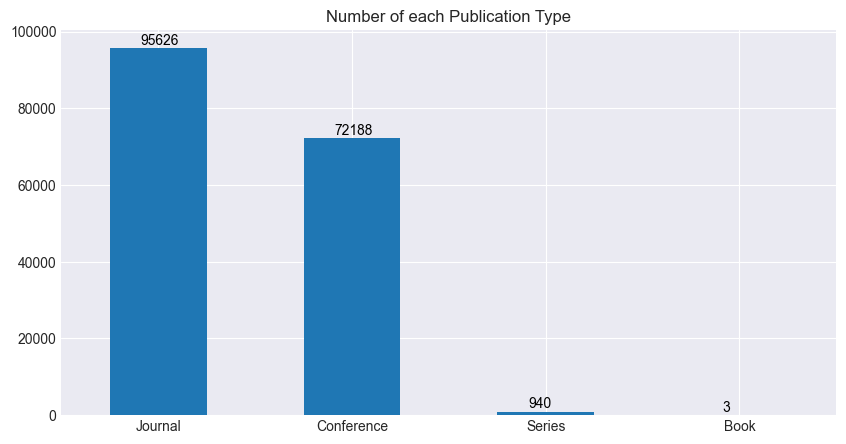

In [12]:
# Bar plot of the number of conferences and journals

df['Publication Type'].value_counts().plot(kind='bar', figsize=(10, 5), title='Number of each Publication Type')

plt.xticks([0, 1, 2, 3], ['Journal', 'Conference', 'Series', 'Book'], rotation=0)
plt.xticks(rotation=0)

for i, v in enumerate(df['Publication Type'].value_counts()):
    plt.text(i-0.09, v+1000, str(v), color='black')

plt.show()

### Temporal Analysis of the Dataset

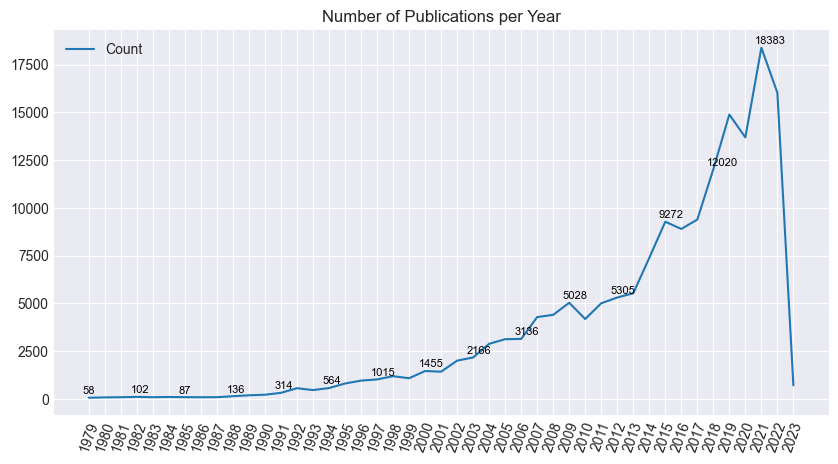

In [22]:
# Bar plot of the number of publications per year

df_pub_year = pd.DataFrame(df['Publication Year'].value_counts())
df_pub_year.rename(columns={'Publication Year':'Count'}, inplace=True)
df_pub_year.sort_index(inplace=True)
df_pub_year.plot(kind='line', figsize=(10, 5), title='Number of Publications per Year')

# for i, v in enumerate(df_pub_year['Count']):
#     if i%3==0:
#         plt.text(i-0.4, v+200, str(v), color='black', fontsize=8, rotation=0)

plt.xticks([i for i in range(0, len(df_pub_year.index), 1)], [int(i) for i in df_pub_year.index], rotation=70)
plt.show()

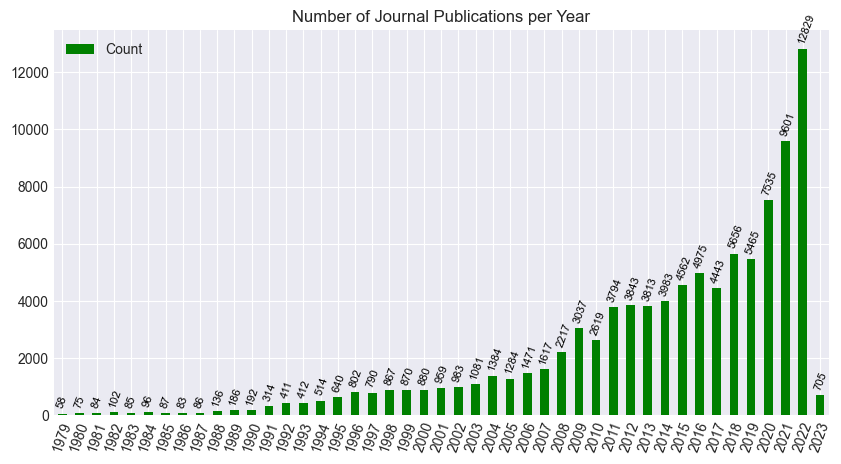

In [14]:
# Bar plot of the number of Journal Publications per year

df_pub_year = pd.DataFrame(df.iloc[np.where(df['Publication Type'] == 'J')]['Publication Year'].value_counts())
df_pub_year.rename(columns={'Publication Year':'Count'}, inplace=True)
df_pub_year.sort_index(inplace=True)
df_pub_year.plot(kind='bar', figsize=(10, 5), title='Number of Journal Publications per Year', color = 'green')

for i, v in enumerate(df_pub_year['Count']):
    plt.text(i-0.4, v+200, str(v), color='black', fontsize=8, rotation=70)

plt.xticks([i for i in range(0, len(df_pub_year.index), 1)], [int(i) for i in df_pub_year.index], rotation=70)

plt.show()

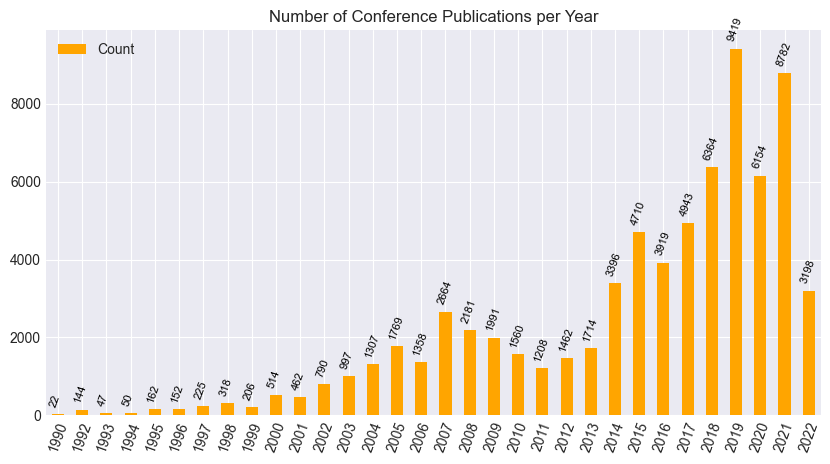

In [15]:
# Bar plot of the number of Conference Publications per year

df_pub_year = pd.DataFrame(df.iloc[np.where(df['Publication Type'] == 'C')]['Publication Year'].value_counts())
df_pub_year.rename(columns={'Publication Year':'Count'}, inplace=True)
df_pub_year.sort_index(inplace=True)
df_pub_year.plot(kind='bar', figsize=(10, 5), title='Number of Conference Publications per Year', color = 'orange')

for i, v in enumerate(df_pub_year['Count']):
    plt.text(i-0.4, v+200, str(v), color='black', fontsize=8, rotation =70)

plt.xticks([i for i in range(0, len(df_pub_year.index), 1)], [int(i) for i in df_pub_year.index], rotation=70)

plt.show()

### Publications Sources Frequency

In [17]:
# Number of Plublications per Source

count = []
for file in os.listdir('./database/venues'):
    df_venue = pd.read_csv('./database/venues/'+file)
    count.append(tuple([file[:-4], df_venue.shape[0]]))

df_pub_source = pd.DataFrame(count, columns=['Source', 'Count'])
df_pub_source.sort_values(by='Count', ascending=False, inplace=True)

# Merge the dataframe with the query_dataframe.csv
df_pub_source = pd.merge(df_pub_source, pd.read_csv('./database/query_dataframe.csv')[['SIGLA', 'Nome']], left_on='Source', right_on='SIGLA', how='left').drop(columns=['SIGLA'])
df_pub_source = df_pub_source[['Nome', 'Source', 'Count']]
df_pub_source.columns = ['Nome', 'SIGLA', 'Count']

df_pub_source.set_index('SIGLA', inplace=True)

df_pub_source = pd.merge(df_pub_source, df.groupby('Venue')['Date'].min().sort_values(ascending=False), left_index=True, right_index=True, how='left')
df_pub_source.rename(columns={'Date':'First Publication'}, inplace=True)
df_pub_source = pd.merge(df_pub_source, df.groupby('Venue')['Date'].max().sort_values(ascending=False), left_index=True, right_index=True, how='left')
df_pub_source.rename(columns={'Date':'Last Publication'}, inplace=True)
print(df_pub_source['First Publication'].min().strftime('%b-%Y'), df_pub_source['Last Publication'].max().strftime('%b-%Y'))
df_pub_source['First Publication'] = df_pub_source['First Publication'].dt.strftime('%b-%Y')
df_pub_source['Last Publication'] = df_pub_source['Last Publication'].dt.strftime('%b-%Y')

df_pub_source['Date Range'] = df_pub_source['First Publication'] + ' to ' + df_pub_source['Last Publication']
df_pub_source.drop(columns=['First Publication', 'Last Publication'], inplace=True)

df_pub_type = pd.DataFrame(df.groupby('Venue')['Publication Type'].value_counts())
df_pub_type.rename(columns={'Publication Type':'Count'}, inplace=True)
df_pub_type.sort_values(by='Count', ascending=False, inplace=True)
df_pub_type = df_pub_type.groupby(level=0).head(1)
df_pub_type.reset_index(inplace=True)

df_pub_type.rename(columns={'Venue':'SIGLA'}, inplace=True)
df_pub_type.set_index('SIGLA', inplace=True)
df_pub_type = df_pub_type[['Publication Type']]

df_pub_source = pd.merge(df_pub_source, df_pub_type, left_index=True, right_index=True, how='left')
df_pub_source.rename(columns={'Publication Type':'Most Frequent Publication Type'}, inplace=True)

df_pub_source['Most Frequent Publication Type'] = df_pub_source['Most Frequent Publication Type'].map({'C':'Conference', 'J':'Journal'})

KeyError: 'Column not found: Date'

In [ ]:
# count nans in df['Date']
df['Date'].isna().sum()

3750

In [74]:
df_pub_source.to_csv('./tables/publications_per_source.csv', index=False)

In [15]:
print("beijinhos nene se cuida feliz ano novo 2023 é nós te amo :o <33333333333333333333333333333333333333333333333333333333333333333333")

beijinhos nene se cuida feliz ano novo 2023 é nós te amo :o <33333333333333333333333333333333333333333333333333333333333333333333


In [66]:
df_pub_source

,Nome,Count,Date Range,Most Frequent Publication Type
SIGLA,,,,
Neurocomputing,Neurocomputing,17830,Feb-1992 to Jan-2023,Journal
ESA,Expert Systems with Applications,17273,Dec-1992 to Apr-2023,Journal
ICML,International Conference on Machine Learning,15785,Oct-1997 to Dec-2022,Conference
ICCV,International Conference on Computer Vision (I...,12051,Jun-1995 to Feb-2022,Conference
AAAI,AAAI Conference on Artificial Intelligence,9246,Nov-2008 to Feb-2021,Conference
WFSC,Applied Soft Computing,8369,Feb-2004 to Nov-2022,Journal
NCA,Neural Computing and Applications,8296,Sep-1997 to Dec-2022,Journal
IEEE-TPAMI,IEEE Transactions on Pattern Analysis and Mach...,7226,Jan-1986 to Dec-2022,Journal
KBS,Knowledge-Based Systems,6767,Mar-1991 to Jan-2023,Journal


In [1]:
df

NameError: name 'df' is not defined